#### Group Information

Group No: Derma_6

- Member 1: Zahir Hariz Bin Zahanis
- Member 2: Aliff Farhan Bin Zulkarnain
- Member 3: Muhammad Luqman Bin Mohammad Khairi 
- Member 4: Luqman Azri Bin Azman 


#### Import libraries

In [1]:
# Disable Jedi autocompletion.
%config Completer.use_jedi=False

# Import the pandas library.
import pandas as pd

# Import the seaborn library
import seaborn as sns

# Import the numpy library.
import numpy as np

# Import the matplotlib library.
import matplotlib.pyplot as plt

# Import the tensorflow library.
import tensorflow as tf

# Import the time library.
import time

# Import the warnings library.
import warnings

# Ignore warnings.
warnings.filterwarnings('ignore')

# Import the necessary metrics from sklearn for evaluation purposes
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#### Load the dataset

In [2]:
# Read the 'dermatology.csv' file into a pandas DataFrame.
df = pd.read_csv('dermatology.csv')

#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.

##### Label Encoding

In [3]:
# Display the first 5 rows of the DataFrame.
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [4]:
# Create a list of column names for labelling the columns
column_names = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age (linear)', 'Result']

# Assign the list of column names to the `columns` attribute of the DataFrame
df.columns = column_names


In [5]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Result
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


##### Data Cleaning

In [6]:
# Print the shape of the DataFrame
df.shape

(365, 35)

In [7]:
#Check the number of null in the dataset
null_counts = df.apply(lambda x: sum(x == '?'), axis=0)
print(null_counts)


erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [8]:
# Replace '?' with actual NaN values
df.replace('?', pd.NA, inplace=True)

# Get the columns with null values
columns_with_null = null_counts[null_counts > 0].index.tolist()

# Remove rows with null values
df.dropna(subset=columns_with_null, inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [9]:
# Count the number of `?` values in each column
df.apply(lambda x: sum(x == '?'), axis=0)

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [10]:
# Check the new shape of the data
df.shape

(357, 35)

##### Normalization

In [11]:
# Calculate descriptive statistics for each column and transpose the result
description = df.describe().transpose()

# Display the complete description
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(description)

                                          count      mean       std  min  25%  \
erythema                                  357.0  2.078431  0.665785  0.0  2.0   
scaling                                   357.0  1.806723  0.702451  0.0  1.0   
definite borders                          357.0  1.574230  0.898318  0.0  1.0   
itching                                   357.0  1.350140  1.133296  0.0  0.0   
koebner phenomenon                        357.0  0.638655  0.909356  0.0  0.0   
polygonal papules                         357.0  0.450980  0.957513  0.0  0.0   
follicular papules                        357.0  0.170868  0.577132  0.0  0.0   
oral mucosal involvement                  357.0  0.380952  0.838321  0.0  0.0   
knee and elbow involvement                357.0  0.621849  0.991466  0.0  0.0   
scalp involvement                         357.0  0.532213  0.913198  0.0  0.0   
family history                            357.0  0.123249  0.329185  0.0  0.0   
melanin incontinence        

In [12]:
# Import the MinMaxScaler class for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalization = scaler.fit_transform(df)

X_normalization

array([[1.        , 1.        , 1.        , ..., 0.        , 0.10666667,
        0.        ],
       [0.66666667, 0.33333333, 0.66666667, ..., 1.        , 0.34666667,
        0.4       ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.53333333,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.66666667, ..., 1.        , 0.37333333,
        0.4       ],
       [0.66666667, 0.33333333, 1.        , ..., 1.        , 0.66666667,
        0.4       ],
       [1.        , 0.66666667, 0.66666667, ..., 0.        , 0.46666667,
        0.        ]])

In [13]:
# Import the StandardScaler class for feature scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
z_score_standardization = scaler.fit_transform(df)

z_score_standardization

array([[ 1.38612659,  1.70111735,  1.58938378, ..., -0.50580259,
        -1.84690329, -1.11981751],
       [-0.11796822, -1.15005116,  0.47462934, ...,  2.2027703 ,
        -0.66985276,  0.13536256],
       [-0.11796822,  0.27553309,  0.47462934, ..., -0.50580259,
         0.24563099, -1.11981751],
       ...,
       [ 1.38612659,  0.27553309,  0.47462934, ...,  2.2027703 ,
        -0.53906936,  0.13536256],
       [-0.11796822, -1.15005116,  1.58938378, ...,  2.2027703 ,
         0.89954796,  0.13536256],
       [ 1.38612659,  0.27553309,  0.47462934, ..., -0.50580259,
        -0.08132749, -1.11981751]])

#### Split the dataset
Split the dataset into training, validation and test sets.

In [14]:
# Extract the response & feature variable 
response = df.columns[-1]
X = df.drop([response], axis = 1)
Y = df[response]

In [15]:
# library that splits arrays or matrices into random subsets for train and test data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [16]:
# Split the X_train and Y_train datasets into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 5)

In [17]:
# display the overall shape for each dataset
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(357, 34)
(228, 34)
(72, 34)
(57, 34)


In [18]:
# Recheck the updated 
X_train.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
259,2,2,1,1,0,0,2,0,0,0,...,0,0,0,2,0,1,2,2,0,8
294,2,1,2,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,34
116,2,2,2,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,46
135,2,2,1,2,2,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,20
25,1,1,0,1,0,0,3,0,1,0,...,1,0,0,1,0,2,2,1,0,10


## Feature Selection
Perform feature selection to select the relevant features.

In [19]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [20]:
# Import the mutual_info_classif function for feature selection based on mutual information

from sklearn.feature_selection import mutual_info_classif

# Define a function to calculate mutual information scores
# by calculating the mutual information scores, then create a series of MI scores and sort in descending order
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Perform feature selection with MI score
mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores

elongation of the rete ridges               0.580224
clubbing of the rete ridges                 0.574175
thinning of the suprapapillary epidermis    0.543635
exocytosis                                  0.487179
focal hypergranulosis                       0.464187
melanin incontinence                        0.461044
oral mucosal involvement                    0.458572
spongiosis                                  0.452993
vacuolisation and damage of basal layer     0.449826
saw-tooth appearance of retes               0.447299
polygonal papules                           0.436028
knee and elbow involvement                  0.402932
fibrosis of the papillary dermis            0.398192
band-like infiltrate                        0.390136
munro microabcess                           0.386629
scalp involvement                           0.374242
PNL infiltrate                              0.290216
disappearance of the granular layer         0.279616
koebner phenomenon                          0.

In [21]:
# Getting the top 10, 20, 30 features based on the highest MI score
top_10_features = mi_scores.head(10).index.tolist()
top_20_features = mi_scores.head(20).index.tolist()
top_30_features = mi_scores.head(30).index.tolist()

In [22]:
# Creating a new dataframe with 10, 20, 30 features
X_10_features = df[top_10_features]
X_20_features = df[top_20_features]
X_30_features = df[top_30_features]

##### Modelling with 10 features

In [23]:
# Split the data into training and testing sets for the top 10 features
X_train_10, X_test_10, Y_train_10, Y_test_10 = train_test_split(X_10_features, Y, test_size = 0.2, random_state = 5)

In [24]:
# Split the X_train_10 and Y_train_10 datasets into training and validation sets
X_train_10, X_val_10, Y_train_10, Y_val_10 = train_test_split(X_train_10, Y_train_10, test_size = 0.2, random_state = 5)

In [25]:
# Import the SMOTE class from the imblearn.over_sampling module
from imblearn.over_sampling import SMOTE

# Create SMOTE insstance & apply SMOTE reseampling to training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_10, Y_train_10)

In [26]:
# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Fitting a RandomForestClassifier model to the training data
model = RandomForestClassifier()
model.fit(X_train_10, Y_train_10)

RandomForestClassifier()

In [27]:
# Import the classification_report function from the sklearn.metrics module
from sklearn.metrics import classification_report

# Import the cross_val_predict function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_predict

# Perform crosee-validated predictions 
predict = cross_val_predict(estimator = model, X = X_train_10, y = Y_train_10, cv = 5)
print("Classification Report: \n", classification_report(Y_train_10, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        73
           2       0.53      0.50      0.51        40
           3       1.00      0.98      0.99        49
           4       0.44      0.57      0.50        28
           5       0.84      0.96      0.90        28
           6       0.00      0.00      0.00        10

    accuracy                           0.80       228
   macro avg       0.63      0.66      0.65       228
weighted avg       0.78      0.80      0.79       228



In [28]:
# Make predictions on the test data
Y_pred_10 = model.predict(X_test_10)

# Generate the classification report
report = classification_report(Y_test_10, Y_pred_10)
print(report)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       0.55      0.55      0.55        11
           3       1.00      1.00      1.00        10
           4       0.56      0.69      0.62        13
           5       0.92      0.86      0.89        14
           6       0.00      0.00      0.00         5

    accuracy                           0.78        72
   macro avg       0.66      0.68      0.67        72
weighted avg       0.74      0.78      0.76        72



##### Modelling with 20 features

In [29]:
# Split the data into training and testing sets for the top 20 features
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X_20_features, Y, test_size = 0.2, random_state = 5)

In [30]:
#?
X_train_20, X_val_20, Y_train_20, Y_val_20 = train_test_split(X_train_20, Y_train_20, test_size = 0.2, random_state = 5)

In [31]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_20, Y_train_20)

In [32]:
# Train the model using the training data
model.fit(X_train_20, Y_train_20)

RandomForestClassifier()

In [33]:
# Train the model using the training data
predict = cross_val_predict(estimator = model, X = X_train_20, y = Y_train_20, cv = 5)
print("Classification Report: \n", classification_report(Y_train_20, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98        73
           2       0.88      0.93      0.90        40
           3       1.00      1.00      1.00        49
           4       0.92      0.86      0.89        28
           5       1.00      1.00      1.00        28
           6       0.78      0.70      0.74        10

    accuracy                           0.95       228
   macro avg       0.93      0.91      0.92       228
weighted avg       0.95      0.95      0.95       228



In [34]:
# Make predictions on the test data
Y_pred_20 = model.predict(X_val_20)

# Generate the classification report
report = classification_report(Y_val_20, Y_pred_20)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        12
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



##### Modelling with 30 features

In [35]:
# Split the data into training and testing sets for the top 20 features
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(X_30_features, Y, test_size = 0.2, random_state = 5)

In [36]:
#?
X_train_30, X_val_30, Y_train_30, Y_val_30 = train_test_split(X_train_30, Y_train_30, test_size = 0.2, random_state = 5)

In [37]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_30, Y_train_30)

In [38]:
# Train the model using the training data
model.fit(X_train_30, Y_train_30)

RandomForestClassifier()

In [39]:
# Train the model using the training data
predict = cross_val_predict(estimator = model, X = X_train_30, y = Y_train_30, cv = 5)
print("Classification Report: \n", classification_report(Y_train_30, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        73
           2       0.90      0.90      0.90        40
           3       1.00      1.00      1.00        49
           4       0.89      0.86      0.87        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        10

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



In [40]:
# Make predictions on the test data
Y_pred_30 = model.predict(X_test_30)

# Generate the classification report
report = classification_report(Y_test_30, Y_pred_30)
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        10
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        14
           6       1.00      0.60      0.75         5

    accuracy                           0.96        72
   macro avg       0.97      0.92      0.93        72
weighted avg       0.96      0.96      0.96        72



##### Modelling with All features

In [41]:
# Apply SMOTE to balance the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [42]:
# Train the model using the training data
model.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
# Perform cross-validation and generate a classification report
predict = cross_val_predict(estimator = model, X = X_train, y = Y_train, cv = 5)
print("Classification Report: \n", classification_report(Y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        73
           2       0.88      0.90      0.89        40
           3       1.00      1.00      1.00        49
           4       0.88      0.82      0.85        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        10

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.96       228
weighted avg       0.96      0.96      0.96       228



In [44]:
# Make predictions on the test data
Y_pred = model.predict(X_val)

# Generate the classification report
report = classification_report(Y_val, Y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



##### Information Gain

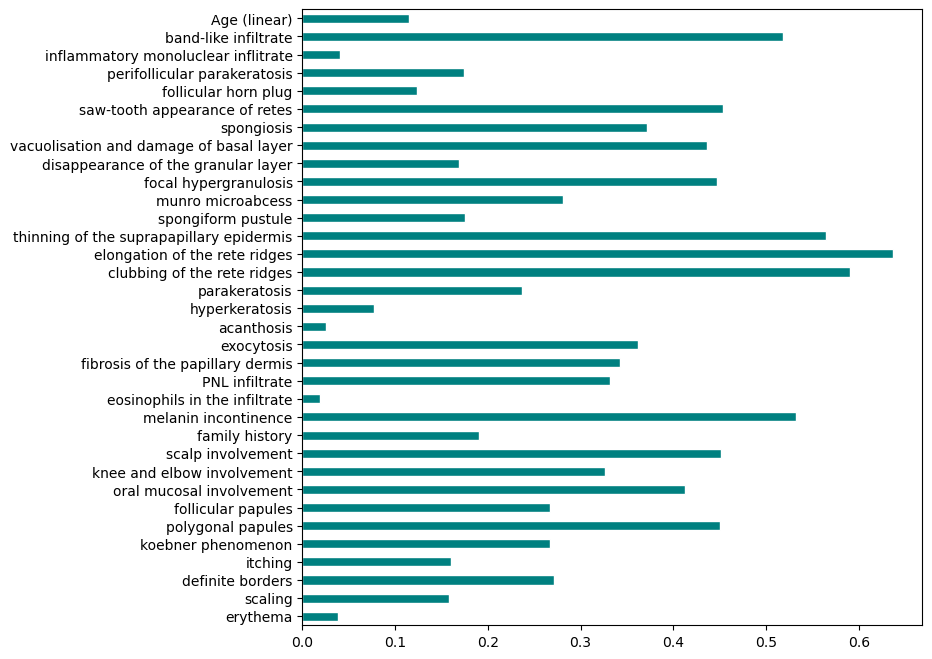

In [45]:
# Compute the feature importances using mutual information
importances = mutual_info_classif(X_train,Y_train)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 8)) 
feat_importances.plot(kind='barh', color='teal', edgecolor='white')  
plt.show()

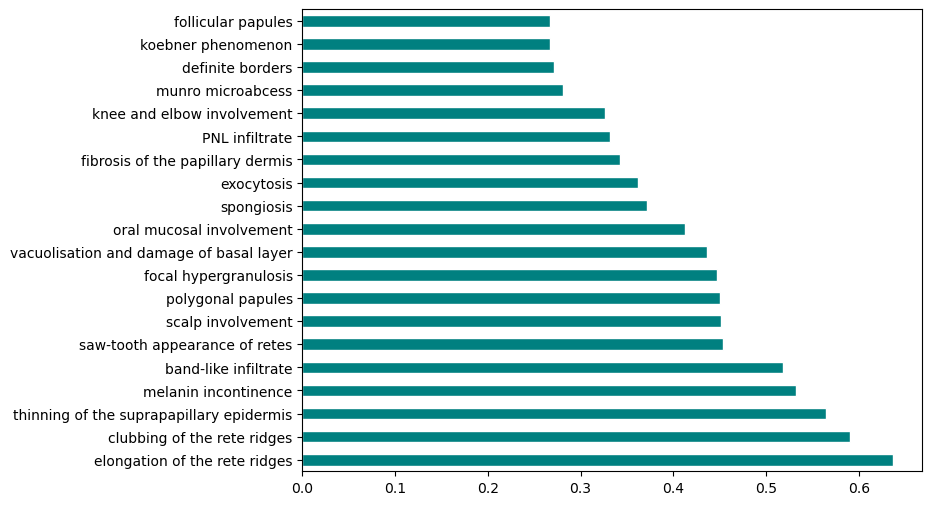

In [46]:
# Create a figure from the selected top 20 features 
# Plot the top 20 features as a horizontal bar chart

k = 20 
top_k_features = feat_importances.nlargest(k)

plt.figure(figsize=(8, 6))
top_k_features.plot(kind='barh', color='teal', edgecolor='white')
plt.show()

In [47]:
# Check top 20 features
top_20_features

['elongation of the rete ridges',
 'clubbing of the rete ridges',
 'thinning of the suprapapillary epidermis',
 'exocytosis',
 'focal hypergranulosis',
 'melanin incontinence',
 'oral mucosal involvement',
 'spongiosis',
 'vacuolisation and damage of basal layer',
 'saw-tooth appearance of retes',
 'polygonal papules',
 'knee and elbow involvement',
 'fibrosis of the papillary dermis',
 'band-like infiltrate',
 'munro microabcess',
 'scalp involvement',
 'PNL infiltrate',
 'disappearance of the granular layer',
 'koebner phenomenon',
 'definite borders']

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Neural Network or Fuzzy Logic System.


##### Support Vector Machine (SVM)

In [48]:
# import library for SVM 
from sklearn.svm import SVC

# Create an Instance of SVM with a linear kernel & fit the model to the training data
C = 0.1
svm = SVC(kernel='linear', C=C)
svm.fit(X_train_20, Y_train_20)

SVC(C=0.1, kernel='linear')

In [49]:
# predict validation data
Y_pred_svm = svm.predict(X_val_20)

#Print Result
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_svm))
print('precision score: ', precision_score(Y_val_20, Y_pred_svm, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_svm, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_svm, average='weighted'))


accuracy score:  0.9649122807017544
precision score:  0.9668615984405459
recall score:  0.9649122807017544
f1 score:  0.9651911973893398


##### Hyperparameter Tuning for SVM

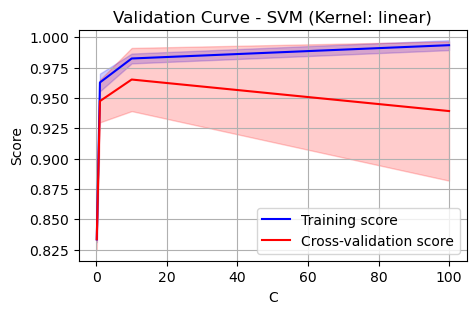

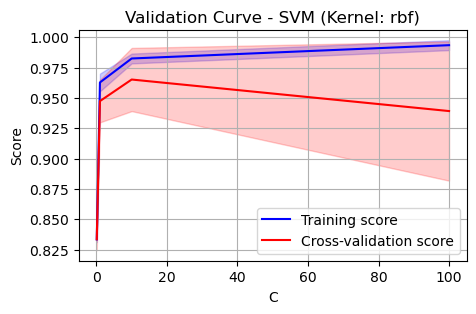

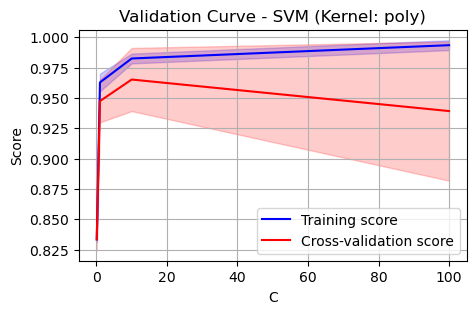

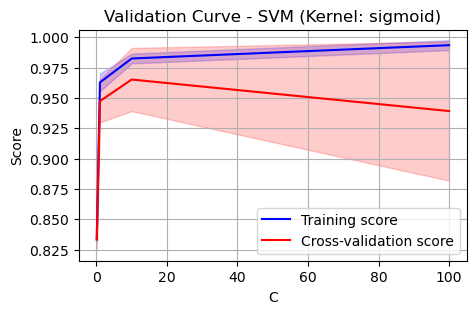

Best C value: 1
Best kernel: linear


In [50]:

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, GridSearchCV

# Define the range of C values to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create the SVM classifier
svm = SVC()

# Compute validation curve for each kernel
for kernel in param_grid['kernel']:
    param_grid_copy = param_grid.copy()  # Create a copy of param_grid

    param_grid_copy['kernel'] = kernel  # Set kernel for this iteration

    train_scores, test_scores = validation_curve(
        svm, X_train_20, Y_train_20, param_name='C', param_range=param_grid_copy['C'], cv=5
    )

    # Calculate mean and standard deviation for training and test scores
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 3))
    plt.plot(param_grid_copy['C'], mean_train_scores, label='Training score', color='b')
    plt.plot(param_grid_copy['C'], mean_test_scores, label='Cross-validation score', color='r')

    # Plot the shaded area showing the variance
    plt.fill_between(param_grid_copy['C'], mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.2, color='b')
    plt.fill_between(param_grid_copy['C'], mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.2, color='r')

    # Add labels and title
    plt.xlabel('C')
    plt.ylabel('Score')
    plt.title(f'Validation Curve - SVM (Kernel: {kernel})')
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.show()

# Perform grid search on the training data
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_20, Y_train_20)

# Get the best C and kernel values
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# Print the best C and kernel values
print("Best C value:", best_C)
print("Best kernel:", best_kernel)


In [51]:
# Create an Instance of SVM with a linear kernel & fit the model to the training data
C = best_C
BK = best_kernel
svm_HT = SVC(kernel=BK, C=C)
svm_HT.fit(X_train_20, Y_train_20)

SVC(C=1, kernel='linear')

In [52]:
#Predict validation data 
Y_pred_svm_HT = svm_HT.predict(X_val_20)

#Print result
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_svm_HT))
print('precision score: ', precision_score(Y_val_20, Y_pred_svm_HT, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_svm_HT, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_svm_HT, average='weighted'))

accuracy score:  0.9649122807017544
precision score:  0.9668615984405459
recall score:  0.9649122807017544
f1 score:  0.9651911973893398


#### Neural Network

In [53]:
from sklearn.neural_network import MLPClassifier

# Create an NN classifier object
NN = MLPClassifier()
# Fit the NN classifier to the training data
NN.fit(X_train_20, Y_train_20)
# Make predictions on the validation data using the trained NN classifier
Y_pred_NN = NN.predict(X_val_20)

# Calculate and print various performance metrics
print('accuracy score: ', accuracy_score(Y_val_20, Y_pred_NN))
print('precision score: ', precision_score(Y_val_20, Y_pred_NN, average='weighted'))
print('recall score: ', recall_score(Y_val_20, Y_pred_NN, average='weighted'))
print('f1 score: ', f1_score(Y_val_20, Y_pred_NN, average='weighted'))


accuracy score:  1.0
precision score:  1.0
recall score:  1.0
f1 score:  1.0


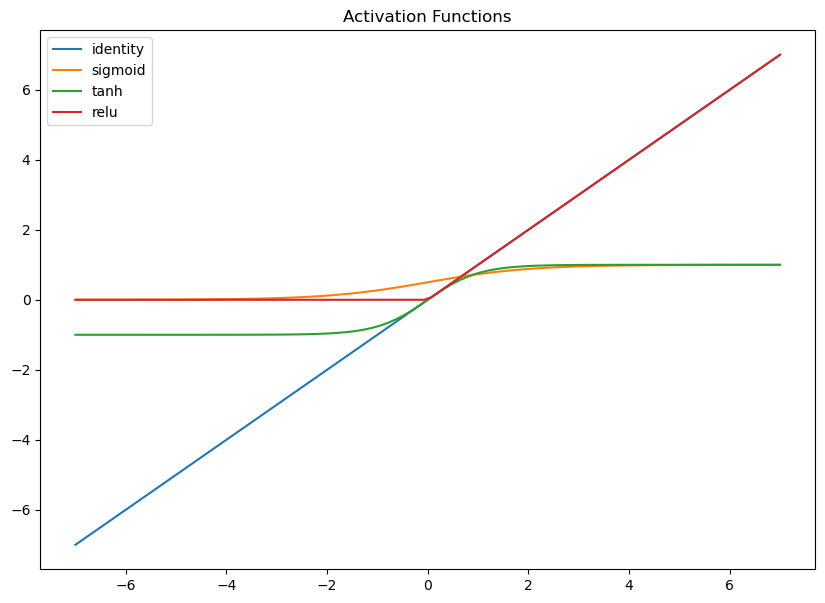

In [54]:

# Define the identity activation function
def identity(x):
    return x

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hyperbolic tangent (tanh) activation function
def tanh(x):
    return np.tanh(x)

# Define the rectified linear unit (ReLU) activation function
def relu(x):
    return np.maximum(0, x)

# Generate values for the x-axis ranging from -7 to 7
x = np.linspace(-7, 7, 100)

# Create a new figure with a size of 10x7 inches
plt.figure(figsize=(10, 7))

# Plot the activation functions on the same graph
plt.plot(x, identity(x), label="identity")  # Plot the identity function
plt.plot(x, sigmoid(x), label="sigmoid")    # Plot the sigmoid function
plt.plot(x, tanh(x), label="tanh")          # Plot the tanh function
plt.plot(x, relu(x), label="relu")          # Plot the ReLU function

# Set the title and add a legend
plt.title("Activation Functions")
plt.legend()

# Display the plot
plt.show()


In [55]:
# Define a parameter grid containing different combinations of hyperparameters to be tuned
param_grid = {
    'hidden_layer_sizes': [(10,10,10), (20,20,20), (100,)],
    'activation': ['identity', 'tanh', 'relu', 'logistic'],
    'batch_size': [16, 32, 64],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
    
}

# Create an MLP classifier with a maximum of 100 iterations
NN = MLPClassifier(max_iter=100)

# Create a GridSearchCV object to perform hyperparameter tuning
# It uses the MLP classifier, the defined parameter grid, performs 4-fold cross-validation, and uses accuracy as the scoring metric
clf = GridSearchCV(NN, param_grid, cv=4, scoring='accuracy')

# Fit the GridSearchCV object to the training data
clf.fit(X_train_20, Y_train_20)


GridSearchCV(cv=4, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['identity', 'tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'batch_size': [16, 32, 64],
                         'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20),
                                                (100,)]},
             scoring='accuracy')

    param_activation param_hidden_layer_sizes  mean_test_score  std_test_score
21          identity             (10, 10, 10)         0.969298        0.014547
70              tanh             (20, 20, 20)         0.964912        0.027739
46              tanh             (20, 20, 20)         0.964912        0.021487
58              tanh             (20, 20, 20)         0.964912        0.012405
67              tanh             (20, 20, 20)         0.964912        0.012405
..               ...                      ...              ...             ...
141         logistic             (10, 10, 10)         0.482456        0.096491
114         logistic             (10, 10, 10)         0.478070        0.084480
135         logistic             (10, 10, 10)         0.456140        0.095288
138         logistic             (10, 10, 10)         0.425439        0.109824
123         logistic             (10, 10, 10)         0.394737        0.093247

[144 rows x 4 columns]


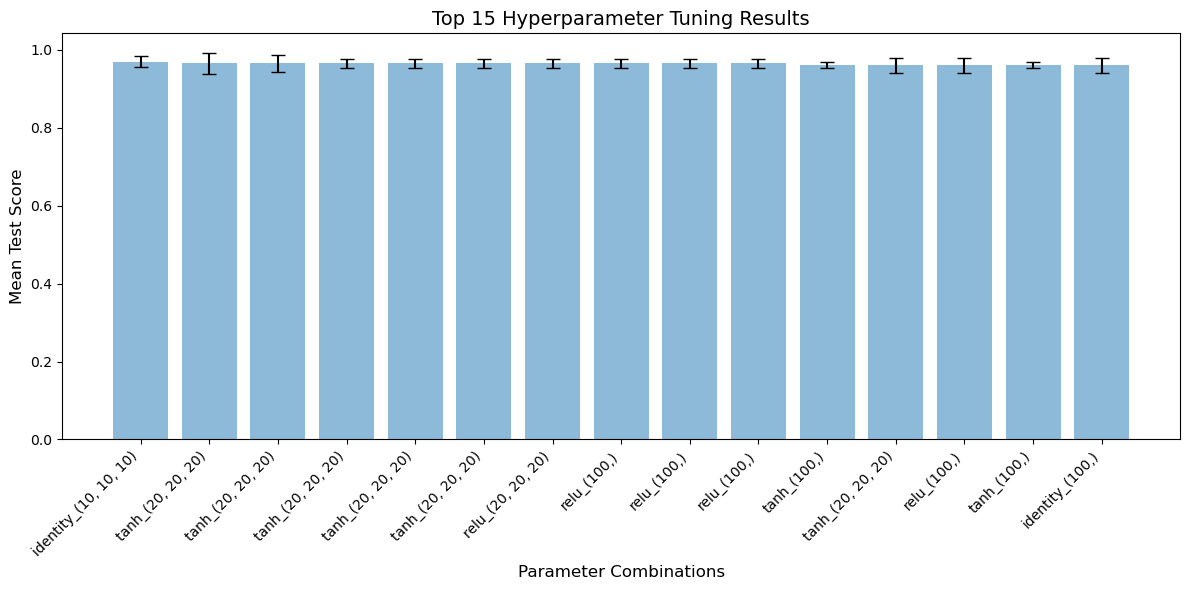

Best score:  0.969298245614035
Best parameters:  {'activation': 'identity', 'alpha': 0.01, 'batch_size': 32, 'hidden_layer_sizes': (10, 10, 10)}
Best activation function:  identity


In [56]:

# Convert the cv_results to DataFrame for better visualization
results_df = pd.DataFrame(clf.cv_results_)

# Select only the rows where the mean_test_score is not NaN
results_df = results_df[results_df['mean_test_score'].notna()]

# Extract the columns that you're interested in
scores_df = results_df[['param_activation', 'param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']]

# Sort the DataFrame based on the mean_test_score in descending order
scores_df = scores_df.sort_values('mean_test_score', ascending=False)

# Print the scores
print(scores_df)

# Select the top 15 combinations based on the mean test scores
top_scores_df = scores_df.head(15)

# Extract the hyperparameter values and scores for the top 15 combinations
parameters = top_scores_df['param_activation'] + '_' + top_scores_df['param_hidden_layer_sizes'].astype(str)
mean_scores = top_scores_df['mean_test_score']
std_scores = top_scores_df['std_test_score']

# Plot the mean test scores
x = np.arange(len(mean_scores))
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, mean_scores, yerr=std_scores, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(parameters, rotation=45, ha='right', fontsize=8)
ax.set_xlabel('Parameter Combinations', fontsize=12)
ax.set_ylabel('Mean Test Score', fontsize=12)
ax.set_title('Top 15 Hyperparameter Tuning Results', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

# ...

print("Best score: ", clf.best_score_)
print("Best parameters: ", clf.best_params_)
print("Best activation function: ", clf.best_params_['activation'])





In [57]:
# Fit the NN model with best parameters obtained from GridSearchCV
NN_HT = MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'],
                            activation=clf.best_params_['activation'],
                            batch_size=clf.best_params_['batch_size'],
                            alpha=clf.best_params_['alpha'])

# Fit the NN model with the best parameters using the training data
NN_HT.fit(X_train_20, Y_train_20)
# Make predictions on the validation data using the MLP model with the best parameters
Y_pred_NN_HT = NN_HT.predict(X_val_20)

# Calculate and print various performance metrics
print('Accuracy score : ', accuracy_score(Y_val_20, Y_pred_NN_HT))
print('Precision score : ', precision_score(Y_val_20, Y_pred_NN_HT, average='weighted'))
print('Recall score : ', recall_score(Y_val_20, Y_pred_NN_HT, average='weighted'))
print('F1 score : ', f1_score(Y_val_20, Y_pred_NN_HT, average='weighted'))




Accuracy score :  1.0
Precision score :  1.0
Recall score :  1.0
F1 score :  1.0


#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix.

#####  Accuracy, Recall, Precision and F1-score 

In [58]:
# Create an empty dictionary named 'results' to store the results or performance metrics
results = {}

In [59]:
# Calculate the evaluation metrics and store results for SVM model 
# Indicators: accuracy, weighted precision, weighted recall, weighted f1 score 
svm.fit(X_train_20, Y_train_20)

#Predict test data
Y_pred_svm = svm.predict(X_test_20)

#Store results
results['Support Vector Machines'] = [accuracy_score(Y_test_20, Y_pred_svm),
                                  precision_score(Y_test_20, Y_pred_svm, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_svm, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_svm, average='weighted')
                                  ]

In [60]:
# Calculate the evaluation metrics and store results for SVM model 
# Indicators: accuracy, weighted precision, weighted recall, weighted f1 score 
svm_HT.fit(X_train_20, Y_train_20)

#Predict test data
Y_pred_svm_HT = svm_HT.predict(X_test_20)

#Store results
results['Support Vector Machines(HyperParameter Tuning)'] = [accuracy_score(Y_test_20, Y_pred_svm_HT),
                                  precision_score(Y_test_20, Y_pred_svm_HT, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_svm_HT, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_svm_HT, average='weighted')
                                  ]

In [61]:
# Fit the Multi-layer Perceptron (MLP) model using the training data
NN.fit(X_train_20, Y_train_20)

# Make predictions on the test data using the trained NN model
Y_pred_NN = NN.predict(X_test_20)

# Calculate various performance metrics and store them in the 'results' dictionary
results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(Y_test_20, Y_pred_NN),
                                  precision_score(Y_test_20, Y_pred_NN, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_NN, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_NN, average='weighted')
                                                      ]

In [62]:
# Fit the Multi-layer Perceptron (MLP) model with hyperparameter tuning using the training data
NN_HT.fit(X_train_20, Y_train_20)
# Make predictions on the test data using the NN model with hyperparameter tuning
Y_pred_NN_HT = NN_HT.predict(X_test_20)
# Calculate various performance metrics and store them in the 'results' dictionary
results['Neural Networks (with HyperParameter Tuning)'] = [accuracy_score(Y_test_20, Y_pred_NN_HT),
                                  precision_score(Y_test_20, Y_pred_NN_HT, average='weighted'),
                                  recall_score(Y_test_20, Y_pred_NN_HT, average='weighted'),
                                  f1_score(Y_test_20, Y_pred_NN_HT, average='weighted')
                                                      ]

In [63]:
# Create a DataFrame from the results dictionary with 'results' as the data
# to determine the accuracy, precision, recall, f1 score
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
Support Vector Machines,0.958333,0.967262,0.958333,0.958116
Support Vector Machines(HyperParameter Tuning),0.972222,0.976496,0.972222,0.972222
Neural Networks (Multi-layer Perceptron),0.986111,0.987269,0.986111,0.986135
Neural Networks (with HyperParameter Tuning),0.972222,0.972222,0.972222,0.972222


As for the result, Neural Network is the best predictive model in predicting dermatology dataset. SVM with hyperparameter tuning comes second before Neural Network with hyperparameter tuning.

##### Confusion Matrix

##### SVM

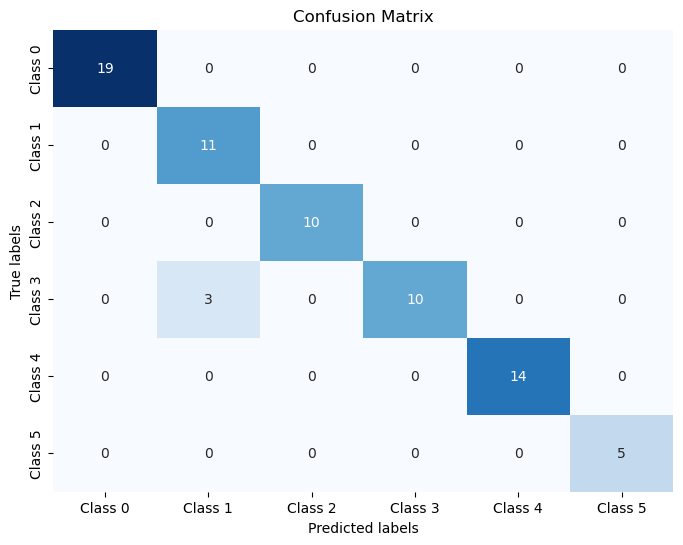

In [64]:
# Assuming Y_test_10 and Y_pred_10 contain the true labels and predicted labels, respectively
cm1 = confusion_matrix(Y_test_20, Y_pred_svm)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  
ax.yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  

# Display the plot
plt.show()

 The first row represents the instances that are actually in the first class. In this case, there are 19 instances. The remaining values in this row are zeros because none of the instances in the first class were misclassified as belonging to any other class. The second row corresponds to the instances actually belonging to the second class. There are 11 instances in this class, and all of them were correctly classified. The third row represents the instances in the third class. All 10 instances in this class were classified correctly. The fourth row corresponds to the instances actually belonging to the fourth class. There are 13 instances in this class, but 3 of them were misclassified as belonging to the second class. The fifth row represents the instances in the fifth class. All 14 instances in this class were correctly classified. The sixth row corresponds to the instances actually belonging to the sixth class. There are 5 instances in this class, and all of them were classified correctly.

#### Neural Network

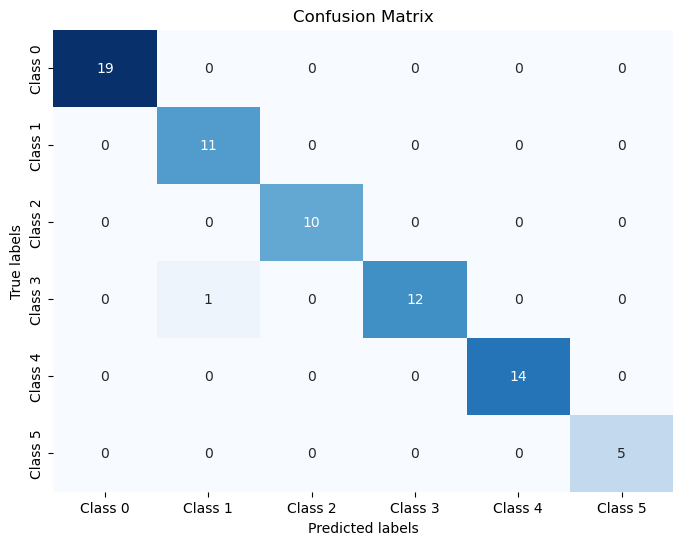

In [65]:
# Assuming Y_test_10 and Y_pred_10 contain the true labels and predicted labels, respectively
cm2 = confusion_matrix(Y_test_20, Y_pred_NN)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  
ax.yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2','Class 3', 'Class 4', 'Class 5'])  

# Display the plot
plt.show()

The first row represents the instances that are actually in the first class. In this case, there are 19 instances. The remaining values in this row are zeros because none of the instances in the first class were misclassified as belonging to any other class. The second row corresponds to the instances actually belonging to the second class. There are 11 instances in this class, and all of them were correctly classified. The third row represents the instances in the third class. All 10 instances in this class were classified correctly. The fourth row corresponds to the instances actually belonging to the fourth class. There are 13 instances in this class, but 1 of them were misclassified as belonging to the second class. The fifth row represents the instances in the fifth class. All 14 instances in this class were correctly classified. The sixth row corresponds to the instances actually belonging to the sixth class. There are 5 instances in this class, and all of them were classified correctly.